In [347]:
!pipenv install opencv-python pyautogui Pillow numpy

Installing opencv-python...
Resolving opencv-python...
✔ Installation Succeeded
⠋ Installing opencv-python...
Installing pyautogui...
Resolving pyautogui...
✔ Installation Succeeded
⠋ Installing pyautogui...
Installing Pillow...
Resolving Pillow...
✔ Installation Succeeded
⠋ Installing Pillow...
Installing numpy...
Resolving numpy...
✔ Installation Succeeded
⠋ Installing numpy...
Installing dependencies from Pipfile.lock (ecc4ce)...


In [348]:
import cv2
import pyautogui
from PIL import Image
from IPython.display import display
import numpy as np

In [349]:
screen_size = pyautogui.size()
screen_size

Size(width=1512, height=982)

In [350]:
target_width = screen_size.width * 0.4
target_height = screen_size.height * 0.25

left = int((screen_size.width - target_width) * 0.5)
top = int((screen_size.height - target_height) * 0.3)

bottom = int(top + target_height)
right = int(left + target_width)

canvas = (left, right, top, bottom)

In [351]:
# image = cv2.imread('full_fishing.png')
image = cv2.imread('full_raining.png')
image = cv2.resize(image, (int(image.shape[1] / 2), int(image.shape[0] / 2)))

In [352]:
cropped_image = image[top:bottom, left:right]

In [353]:
# Convert to grayscale
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Noise reduction
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge detection
edged = cv2.Canny(blurred, 50, 130)

# Finding contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

len(contours)

2

In [354]:
for c in contours:
    # Compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    
    # Draw the bounding box
    cv2.rectangle(cropped_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [355]:
image_center = (cropped_image.shape[1] / 2, cropped_image.shape[0] / 2)

# Initialize variables to store the minimum distance and the corresponding rectangle
min_distance = float('inf')
closest_rectangle = None

for c in contours:
    # Compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    
    # Calculate the center of the rectangle
    rect_center = (x + w / 2, y + h / 2)

    # Compute the Euclidean distance from the image center
    distance = ((rect_center[0] - image_center[0]) ** 2 + (rect_center[1] - image_center[1]) ** 2) ** 0.5

    # Update the minimum distance and rectangle if needed
    if distance < min_distance:
        min_distance = distance
        closest_rectangle = (x, y, w, h)

In [356]:
if closest_rectangle is not None:
    (x, y, w, h) = closest_rectangle
    cv2.rectangle(cropped_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

In [357]:
cv2.rectangle(image, (left, top), (right, bottom), (255, 0, 0), 2)
''

''

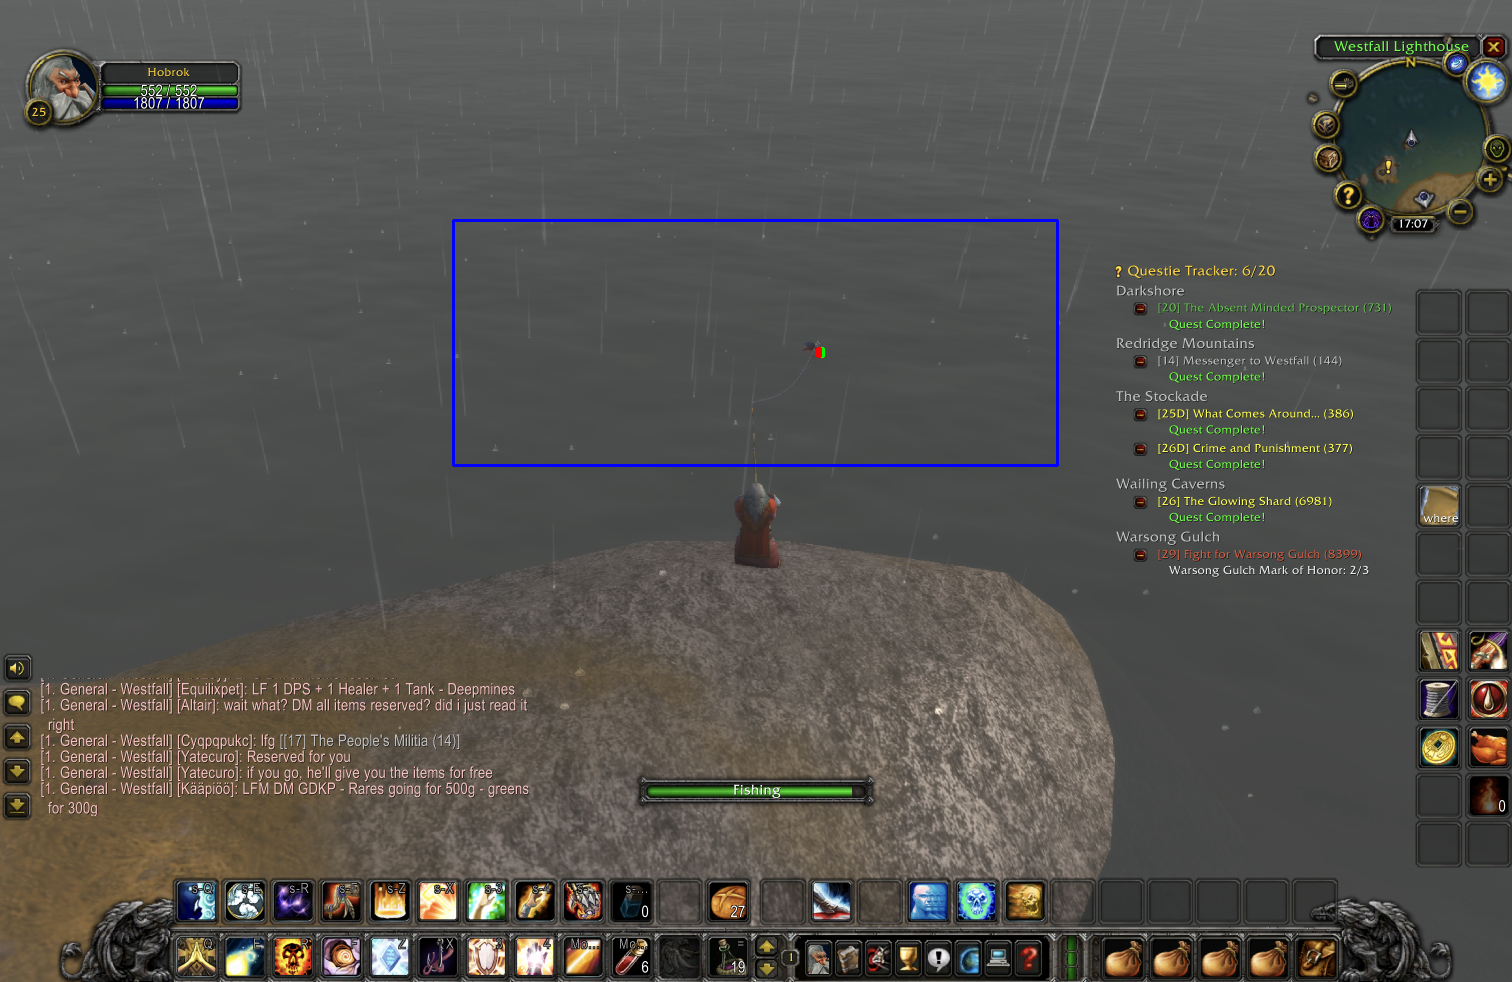

In [358]:
display(Image.fromarray(cv.cvtColor(image, cv.COLOR_BGR2RGB)))